In [1]:
import numpy as np
import pandas as pd

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

In [4]:
df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.head()

1040000
203869


,s1,s2,s3,s4,s5
0,86,91,89,94,85
1,93,82,82,88,83
2,80,87,83,98,92
3,92,85,95,97,90
4,80,97,80,91,82


In [6]:
df.tail()

,s1,s2,s3,s4,s5
39995,0,27,15,28,21
39996,17,23,19,23,30
39997,3,30,30,26,22
39998,1,25,24,23,22
39999,4,14,3,26,22


## Symbolic AI

In [7]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df


,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,86,91,89,94,85,500,445,89.0,A+
1,93,82,82,88,83,500,428,85.6,A+
2,80,87,83,98,92,500,440,88.0,A+
3,92,85,95,97,90,500,459,91.8,A+
4,80,97,80,91,82,500,430,86.0,A+
...,...,...,...,...,...,...,...,...,...
39995,0,27,15,28,21,500,91,18.2,Fail
39996,17,23,19,23,30,500,112,22.4,Fail
39997,3,30,30,26,22,500,111,22.2,Fail
39998,1,25,24,23,22,500,95,19.0,Fail


In [8]:
df.Grade.value_counts()

Fail    39968
A+      39737
B       29210
C       29113
A       29080
D       28985
E        7776
Name: Grade, dtype: int64

In [12]:
df1 = pd.DataFrame()
test = pd.DataFrame()

for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7676)])
    test = pd.concat([test,df[df.Grade==i].tail(100)])

print(len(df1))
print(len(test))


53732
700


## Create data for ML

In [17]:
data = df1[["s1","s2","s3",'s4','s5',"Percentage",'Grade']].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Percentage,Grade
1532,57,54,51,53,56,54.2,C
2065,38,37,35,34,35,35.8,E
2841,90,98,81,80,91,88.0,A+
7184,51,56,53,51,56,53.4,C
6654,95,97,90,88,96,93.2,A+
...,...,...,...,...,...,...,...
4941,25,23,4,25,6,16.6,Fail
481,8,24,31,0,6,13.8,Fail
165,77,73,72,77,75,74.8,A
5419,76,71,75,78,74,74.8,A


In [18]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10132\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,s1,s2,s3,s4,s5,Percentage
s1,1.000000,0.961285,0.961207,0.961094,0.961025,0.984296
s2,0.961285,1.000000,0.961589,0.961226,0.961424,0.984480
s3,0.961207,0.961589,1.000000,0.961296,0.961234,0.984461
s4,0.961094,0.961226,0.961296,1.000000,0.961008,0.984317
s5,0.961025,0.961424,0.961234,0.961008,1.000000,0.984314
Percentage,0.984296,0.984480,0.984461,0.984317,0.984314,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_10132\759093254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar')


<AxesSubplot:>

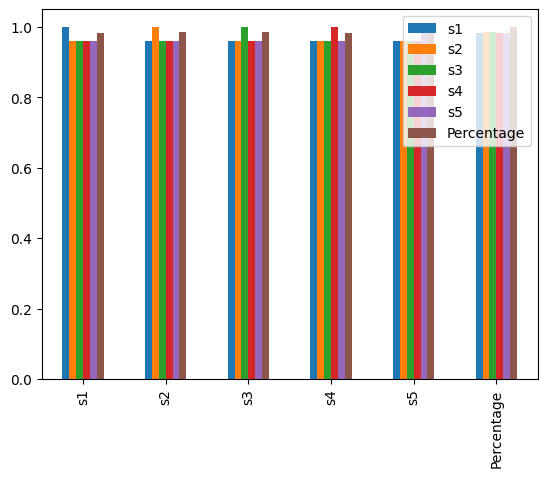

In [19]:
data.corr().plot(kind='bar')

In [20]:
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}

data['Grade1'] = data.Grade.map(grades)# map with dictionary
data

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
1532,57,54,51,53,56,54.2,C,4
2065,38,37,35,34,35,35.8,E,2
2841,90,98,81,80,91,88.0,A+,7
7184,51,56,53,51,56,53.4,C,4
6654,95,97,90,88,96,93.2,A+,7
...,...,...,...,...,...,...,...,...
4941,25,23,4,25,6,16.6,Fail,1
481,8,24,31,0,6,13.8,Fail,1
165,77,73,72,77,75,74.8,A,6
5419,76,71,75,78,74,74.8,A,6


C:\Users\Dell\AppData\Local\Temp\ipykernel_10132\759093254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar')


<AxesSubplot:>

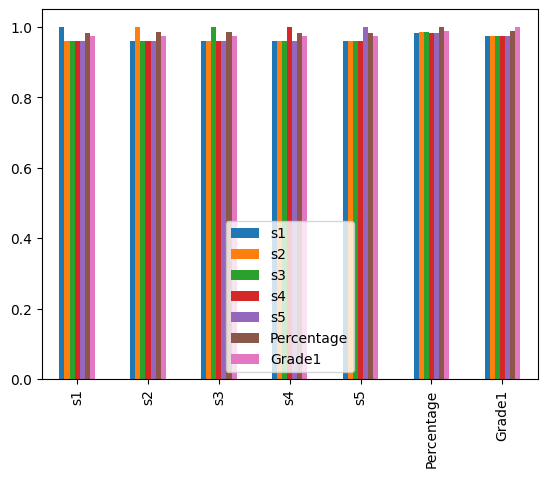

In [21]:
data.corr().plot(kind='bar')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10132\2545985938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar', legend=False)


<AxesSubplot:>

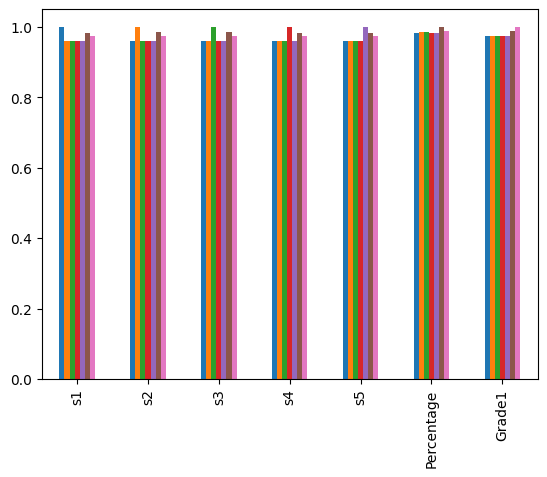

In [22]:
data.corr().plot(kind='bar', legend=False)

In [23]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989213
Grade1,0.989213,1.000000


## Find Grade (Rules) with Machine Learning

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989213
Grade1,0.989213,1.000000


### Now select the feature based on above stats technique

In [26]:
data.head()

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
1532,57,54,51,53,56,54.2,C,4
2065,38,37,35,34,35,35.8,E,2
2841,90,98,81,80,91,88.0,A+,7
7184,51,56,53,51,56,53.4,C,4
6654,95,97,90,88,96,93.2,A+,7


In [27]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade

In [28]:
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Percentage
1532,54.2
2065,35.8
2841,88.0
7184,53.4
6654,93.2


In [29]:
print(type(Y))
Y.head()


<class 'pandas.core.series.Series'>


1532     C
2065     E
2841    A+
7184     C
6654    A+
Name: Grade, dtype: object

### Split data in Training and Test dataset
- X_train, X_test
- Y_train, Y_test

In [30]:
print("X len",len(X),"Y len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=True)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))


X len 53732 Y len 53732
train X 38102
37612
37612
16120
16120


In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf = clf.fit(X_train, Y_train)


In [33]:
X_test


,Percentage
2034,90.4
7506,44.4
7504,12.0
3554,35.8
7260,13.2
...,...
5515,44.2
7725,73.4
6672,54.0
3028,53.8


In [34]:
Y_predict = clf.predict(X_test)
Y_predict

array(['A+', 'D', 'Fail', ..., 'C', 'C', 'A+'], dtype=object)

In [35]:
abc = X_test.copy()
abc['Actual_Y'] = Y_test
abc['predication'] = clf.predict(X_test)# add prediction column

abc


,Percentage,Actual_Y,predication
2034,90.4,A+,A+
7506,44.4,D,D
7504,12.0,Fail,Fail
3554,35.8,E,E
7260,13.2,Fail,Fail
...,...,...,...
5515,44.2,D,D
7725,73.4,A,A
6672,54.0,C,C
3028,53.8,C,C


In [36]:
print(metrics.classification_report(Y_test,Y_predict))


              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2287
          A+       1.00      1.00      1.00      2222
           B       1.00      1.00      1.00      2258
           C       1.00      1.00      1.00      2356
           D       1.00      1.00      1.00      2306
           E       1.00      1.00      1.00      2324
        Fail       1.00      1.00      1.00      2367

    accuracy                           1.00     16120
   macro avg       1.00      1.00      1.00     16120
weighted avg       1.00      1.00      1.00     16120



In [37]:
clf.predict([[31]])


c:\Python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['E'], dtype=object)

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.7777777777777778, 0.9166666666666666, 'x[0] <= 79.3\ngini = 0.857\nsamples = 37612\nvalue = [5389, 5454, 5418, 5320, 5370, 5352, 5309]\nclass = y[1]'),
 Text(0.6666666666666666, 0.75, 'x[0] <= 68.9\ngini = 0.833\nsamples = 32158\nvalue = [5389, 0, 5418, 5320, 5370, 5352, 5309]\nclass = y[2]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[0] <= 58.8\ngini = 0.8\nsamples = 26769\nvalue = [0, 0, 5418, 5320, 5370, 5352, 5309]\nclass = y[2]'),
 Text(0.4444444444444444, 0.4166666666666667, 'x[0] <= 39.1\ngini = 0.75\nsamples = 21351\nvalue = [0, 0, 0, 5320, 5370, 5352, 5309]\nclass = y[4]'),
 Text(0.2222222222222222, 0.25, 'x[0] <= 30.6\ngini = 0.5\nsamples = 10661\nvalue = [0, 0, 0, 0, 0, 5352, 5309]\nclass = y[5]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 5309\nvalue = [0, 0, 0, 0, 0, 0, 5309]\nclass = y[6]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 5352\nvalue = [0, 0, 0, 0, 0, 5352, 0]\nclass = y[5]'),
 Text(0.666666

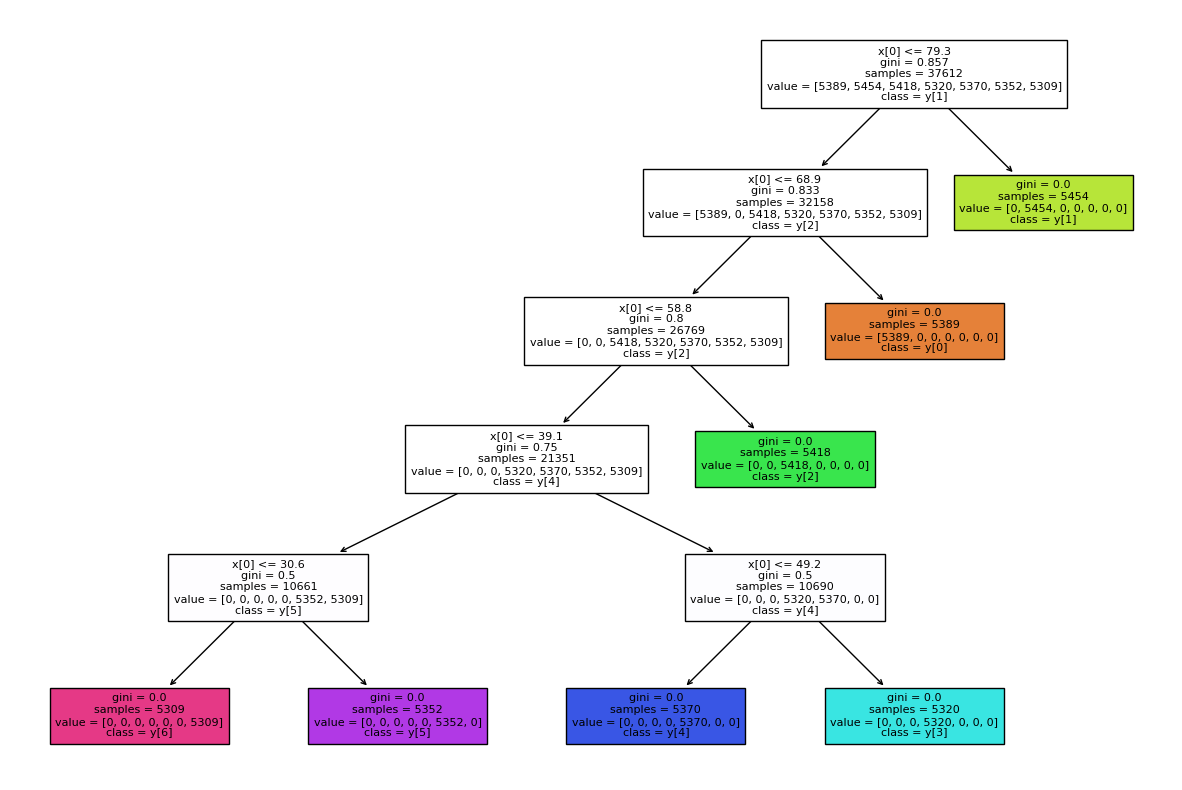

In [39]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)
